In [1]:
import tensorflow as tf
import os
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# import os
# print(os.listdir('../input/garbage classification/Garbage classification'))

In [5]:
data_path = '../input/garbage classification/Garbage classification'

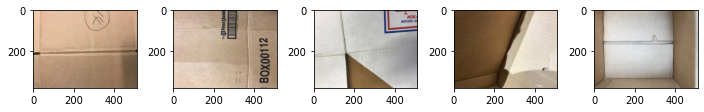

In [6]:
plot_imgs(data_path+'/cardboard')

In [7]:
batch_size = 32

In [8]:
# Data Generator
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='training')

test_generator=test.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [9]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [10]:
num_classes = 6

In [11]:
# Build Model
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(512,384,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 384, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 192, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 192, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 96, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 96, 32)       18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 48, 32)        0         
_________________________________________

In [12]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model_path="garbage_cnn.h5"
#checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint1]

In [14]:
num_epochs = 200
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [15]:
# Train Model
history = model.fit_generator(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    validation_steps=step_size_test)#,callbacks=callbacks_list)

Epoch 1/200
71/71 [==============================] - 75s 1s/step - loss: 1.7399 - acc: 0.2709 - val_loss: 1.5006 - val_acc: 0.3795
Epoch 2/200
71/71 [==============================] - 66s 931ms/step - loss: 1.5833 - acc: 0.3565 - val_loss: 1.7063 - val_acc: 0.2679
Epoch 3/200
71/71 [==============================] - 66s 930ms/step - loss: 1.6246 - acc: 0.3164 - val_loss: 1.4757 - val_acc: 0.3750
Epoch 4/200
71/71 [==============================] - 74s 1s/step - loss: 1.4263 - acc: 0.4135 - val_loss: 1.3510 - val_acc: 0.4330
Epoch 5/200
71/71 [==============================] - 66s 932ms/step - loss: 1.4083 - acc: 0.4216 - val_loss: 1.3656 - val_acc: 0.4509
Epoch 6/200
71/71 [==============================] - 66s 933ms/step - loss: 1.3522 - acc: 0.4594 - val_loss: 1.3259 - val_acc: 0.4598
Epoch 7/200
71/71 [==============================] - 66s 936ms/step - loss: 1.3569 - acc: 0.4617 - val_loss: 1.4049 - val_acc: 0.4420
Epoch 8/200
71/71 [==============================] - 66s 934ms/step 

71/71 [==============================] - 67s 939ms/step - loss: 1.0415 - acc: 0.6239 - val_loss: 0.9505 - val_acc: 0.6830
Epoch 38/200
71/71 [==============================] - 66s 929ms/step - loss: 1.0237 - acc: 0.6309 - val_loss: 0.9927 - val_acc: 0.6205
Epoch 39/200
71/71 [==============================] - 67s 941ms/step - loss: 0.9398 - acc: 0.6622 - val_loss: 0.9571 - val_acc: 0.6429
Epoch 40/200
71/71 [==============================] - 67s 942ms/step - loss: 0.9274 - acc: 0.6591 - val_loss: 0.9769 - val_acc: 0.6339
Epoch 41/200
71/71 [==============================] - 67s 950ms/step - loss: 0.9598 - acc: 0.6532 - val_loss: 0.9235 - val_acc: 0.6339
Epoch 42/200
71/71 [==============================] - 66s 927ms/step - loss: 0.9448 - acc: 0.6575 - val_loss: 0.9402 - val_acc: 0.6384
Epoch 43/200
71/71 [==============================] - 68s 951ms/step - loss: 0.9400 - acc: 0.6532 - val_loss: 1.0650 - val_acc: 0.6205
Epoch 44/200
71/71 [==============================] - 166s 2s/step -

71/71 [==============================] - 66s 935ms/step - loss: 0.8263 - acc: 0.7010 - val_loss: 0.8727 - val_acc: 0.6607
Epoch 75/200
71/71 [==============================] - 66s 933ms/step - loss: 0.8233 - acc: 0.7005 - val_loss: 0.9047 - val_acc: 0.6830
Epoch 76/200
71/71 [==============================] - 66s 936ms/step - loss: 0.8470 - acc: 0.6979 - val_loss: 0.9778 - val_acc: 0.6339
Epoch 77/200
71/71 [==============================] - 346s 5s/step - loss: 0.8634 - acc: 0.6836 - val_loss: 0.9112 - val_acc: 0.6607
Epoch 78/200
71/71 [==============================] - 636s 9s/step - loss: 0.7985 - acc: 0.7188 - val_loss: 0.8914 - val_acc: 0.6830
Epoch 79/200
71/71 [==============================] - 659s 9s/step - loss: 0.8513 - acc: 0.6894 - val_loss: 0.7688 - val_acc: 0.6964
Epoch 80/200
71/71 [==============================] - 555s 8s/step - loss: 0.8385 - acc: 0.6894 - val_loss: 0.8995 - val_acc: 0.6384
Epoch 81/200
71/71 [==============================] - 399s 6s/step - loss: 0

71/71 [==============================] - 67s 948ms/step - loss: 0.6660 - acc: 0.7698 - val_loss: 0.8115 - val_acc: 0.7054
Epoch 111/200
71/71 [==============================] - 66s 932ms/step - loss: 0.7358 - acc: 0.7308 - val_loss: 0.8140 - val_acc: 0.7009
Epoch 112/200
71/71 [==============================] - 66s 933ms/step - loss: 0.6399 - acc: 0.7585 - val_loss: 0.7195 - val_acc: 0.7455
Epoch 113/200
71/71 [==============================] - 65s 920ms/step - loss: 0.6846 - acc: 0.7410 - val_loss: 0.9163 - val_acc: 0.7143
Epoch 114/200
71/71 [==============================] - 67s 945ms/step - loss: 0.6783 - acc: 0.7540 - val_loss: 0.7281 - val_acc: 0.7411
Epoch 115/200
71/71 [==============================] - 66s 932ms/step - loss: 0.6910 - acc: 0.7384 - val_loss: 0.8498 - val_acc: 0.7321
Epoch 116/200
71/71 [==============================] - 65s 921ms/step - loss: 0.6475 - acc: 0.7712 - val_loss: 0.7749 - val_acc: 0.7232
Epoch 117/200
71/71 [==============================] - 67s 944

Epoch 147/200
71/71 [==============================] - 67s 939ms/step - loss: 0.5940 - acc: 0.7803 - val_loss: 0.8920 - val_acc: 0.7366
Epoch 148/200
71/71 [==============================] - 66s 935ms/step - loss: 0.6944 - acc: 0.7487 - val_loss: 0.8917 - val_acc: 0.7321
Epoch 149/200
71/71 [==============================] - 67s 939ms/step - loss: 0.5811 - acc: 0.7879 - val_loss: 0.7813 - val_acc: 0.7679
Epoch 150/200
71/71 [==============================] - 66s 931ms/step - loss: 0.5750 - acc: 0.7910 - val_loss: 0.8084 - val_acc: 0.7411
Epoch 151/200
71/71 [==============================] - 67s 937ms/step - loss: 0.5652 - acc: 0.7852 - val_loss: 0.8551 - val_acc: 0.7455
Epoch 152/200
71/71 [==============================] - 66s 932ms/step - loss: 0.5433 - acc: 0.8008 - val_loss: 0.9098 - val_acc: 0.7366
Epoch 153/200
71/71 [==============================] - 67s 944ms/step - loss: 0.5419 - acc: 0.8021 - val_loss: 0.8492 - val_acc: 0.7366
Epoch 154/200
71/71 [===========================

71/71 [==============================] - 68s 951ms/step - loss: 0.5423 - acc: 0.7962 - val_loss: 1.0204 - val_acc: 0.7277
Epoch 184/200
71/71 [==============================] - 66s 924ms/step - loss: 0.5999 - acc: 0.7820 - val_loss: 0.7445 - val_acc: 0.7455
Epoch 185/200
71/71 [==============================] - 67s 948ms/step - loss: 0.6032 - acc: 0.7879 - val_loss: 0.7658 - val_acc: 0.7455
Epoch 186/200
71/71 [==============================] - 67s 938ms/step - loss: 0.5545 - acc: 0.7977 - val_loss: 0.8085 - val_acc: 0.7545
Epoch 187/200
71/71 [==============================] - 66s 924ms/step - loss: 0.5899 - acc: 0.7834 - val_loss: 0.8100 - val_acc: 0.7500
Epoch 188/200
71/71 [==============================] - 67s 950ms/step - loss: 0.5602 - acc: 0.8002 - val_loss: 0.8092 - val_acc: 0.7143
Epoch 189/200
71/71 [==============================] - 67s 942ms/step - loss: 0.6131 - acc: 0.7888 - val_loss: 0.9453 - val_acc: 0.7232
Epoch 190/200
71/71 [==============================] - 66s 936

In [16]:
model.save('my_model.h5') 

In [27]:
glassPath = 'D:/FMI code/test_images_save/images/1603562498.jpeg'
img_width = 384
img_height = 512

img_width = model.input_shape[2]
img_height = model.input_shape[1]

# img_width = 300
# img_height = 300

# img_width = 224
# img_height = 224

img = keras.preprocessing.image.load_img(
    glassPath, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [25]:

predictions = model.predict(img_array, steps=1)
score = tf.nn.softmax(predictions[0])

In [26]:
predictions

array([[0., 0., 0., 0., 1., 0.]], dtype=float32)

In [38]:
cardboard1 = "D:\FMI code\input\Garbage classification\Garbage classification\cardboard\cardboard1.jpg"
glass1 = "D:\FMI code\input\Garbage classification\Garbage classification\glass\glass9.jpg"
metal1 = "D:\FMI code\input\Garbage classification\Garbage classification\metal\metal28.jpg"
paper1 = "D:\FMI code\input\Garbage classification\Garbage classification\paper\paper60.jpg"
plastic1 = "D:\FMI code\input\Garbage classification\Garbage classification\plastic\plastic32.jpg"
trash1 = "D:\FMI code\input\Garbage classification\Garbage classification\trash\trash50.jpg"

allImages = [cardboard1, glass1, metal1, paper1, plastic1]
for image in allImages:
    img = keras.preprocessing.image.load_img(
        image, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array, steps=1)
    score = tf.nn.softmax(predictions[0])
    
    print(predictions)

[[0. 0. 0. 0. 1. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]]
